In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing



In [2]:
# --- When to Use Square Root Transformation ---
# The Square Root Transformation is a type of power transformation used to reduce right-skewness
# in a dataset. It's milder than the log transformation.
#
# Key Requirements:
# 1. Non-negativity: The data must be non-negative (values must be >= 0).
# 2. Goal: The primary goal is often to stabilize variance, make the data's distribution
#    more symmetric (closer to normal), and improve the performance of models that assume normality.




In [3]:
# 1. Load a sample dataset
# We'll use the California Housing dataset from scikit-learn, which has several skewed features.
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target # Add the target variable as well



In [4]:
# 2. Select a feature to work with
# Let's examine the distribution of the 'Population' (average number of household members) feature.
print("Original 'Population' feature description:")
print(df['Population'].describe())
print("\nSkewness of original 'Population':", df['Population'].skew())

# A high skewness value (typically > 1) indicates significant right-skew.



Original 'Population' feature description:
count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: Population, dtype: float64

Skewness of original 'Population': 4.93585822672712


In [5]:
# 3. Apply the Square Root Transformation
# We create a new column to store the transformed data.
# The transformation is applied by taking the square root of each value in the column.
df['Population_sqrt'] = np.sqrt(df['Population'])



In [6]:
# 4. Show the result of applying the technique
# We can see the effect by comparing the distribution of the original and transformed data.

print("\n--- After Square Root Transformation ---")
print("Transformed 'Population_sqrt' feature description:")
print(df['Population_sqrt'].describe())
print("\nSkewness of transformed 'Population_sqrt':", df['Population_sqrt'].skew())





--- After Square Root Transformation ---
Transformed 'Population_sqrt' feature description:
count    20640.000000
mean        35.661883
std         12.398157
min          1.732051
25%         28.053520
50%         34.146742
75%         41.533119
max        188.896797
Name: Population_sqrt, dtype: float64

Skewness of transformed 'Population_sqrt': 1.2246549321367803


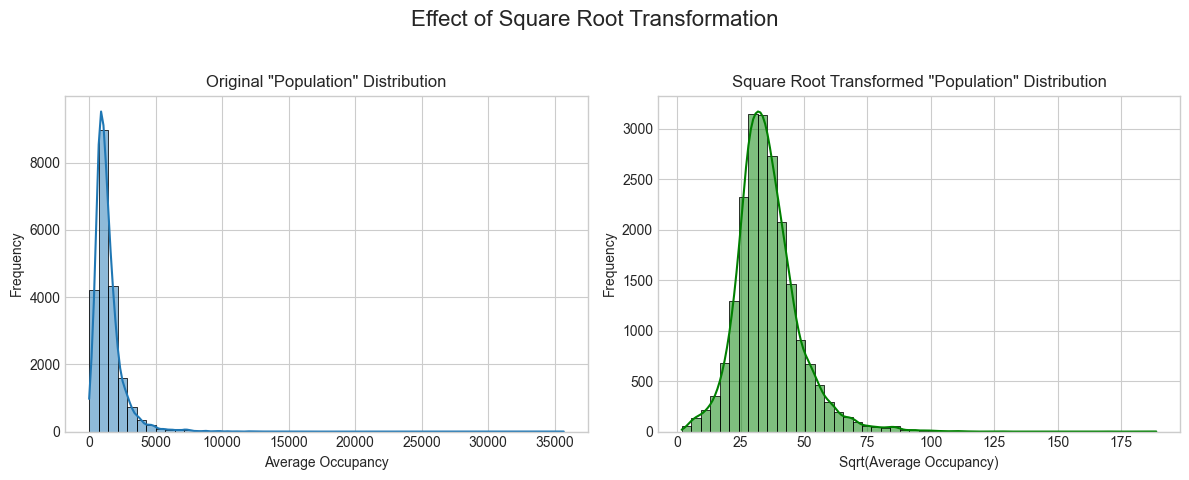

In [7]:
# 5. Create a before-and-after visualization
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot original data
sns.histplot(df['Population'], kde=True, ax=axes[0], bins=50)
axes[0].set_title('Original "Population" Distribution')
axes[0].set_xlabel('Average Occupancy')
axes[0].set_ylabel('Frequency')


# Plot transformed data
sns.histplot(df['Population_sqrt'], kde=True, ax=axes[1], color='green', bins=50)
axes[1].set_title('Square Root Transformed "Population" Distribution')
axes[1].set_xlabel('Sqrt(Average Occupancy)')
axes[1].set_ylabel('Frequency')

fig.suptitle('Effect of Square Root Transformation', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




In [8]:
# 6. Print the head of the resulting DataFrame
# This shows the new column alongside the original data.
print("\nDataFrame head with the new transformed column:")
print(df[['Population', 'Population_sqrt']].head())


DataFrame head with the new transformed column:
   Population  Population_sqrt
0       322.0        17.944358
1      2401.0        49.000000
2       496.0        22.271057
3       558.0        23.622024
4       565.0        23.769729
